In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stemgraphic
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.metrics as sk
from pandas.plotting import scatter_matrix
from statsmodels.stats.anova import anova_lm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

##  <span style = "background:yellow"> 1. Dataset </span>
##### <span style = "background:red"> 1.1 Loading the dataset </span>

In [6]:
carData=pd.read_csv("dataset-11424.csv")
print("----------------------------------First five observation of dataset---------------------")
carData.head()

----------------------------------First five observation of dataset---------------------


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
print("-------------------------Concise summary of the DataFrame------------------------------------")
carData.info()

-------------------------Concise summary of the DataFrame------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Carseat dataset contains 400 observations with 8 numeric attributes and 3 object attribute which are categorical in nature

##  <span style = "background:yellow"> 2. Univariate Analysis </span>
##### <span style = "background:red"> 2.1 Summarise the data </span>

In [8]:
print("---------------------------------Descriptive Summary of Numeric variable--------------------------")
carData.describe()

---------------------------------Descriptive Summary of Numeric variable--------------------------


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


**As seen above, the mean and median(50%) values for Price and Sales are almost equivalent, indicating that their distributions are somewhat symmetric**

In [10]:
print("---------------------------------Descriptive Summary of Categorical variable------------------------")
carData.describe(include=np.object0)

---------------------------------Descriptive Summary of Categorical variable------------------------


,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


In [11]:
print(carData["ShelveLoc"].unique())
print(carData["Urban"].unique())
print(carData["US"].unique())

['Bad' 'Good' 'Medium']
['Yes' 'No']
['Yes' 'No']


##### <span style = "background:red"> 2.2 Distribution of variables </span>

(<Figure size 540x360 with 1 Axes>, <Axes:>)

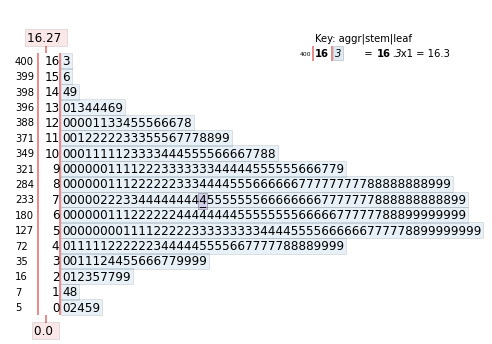

In [14]:
stemgraphic.stem_graphic(carData["Sales"],scale=1)

(<Figure size 540x378 with 1 Axes>, <Axes:>)

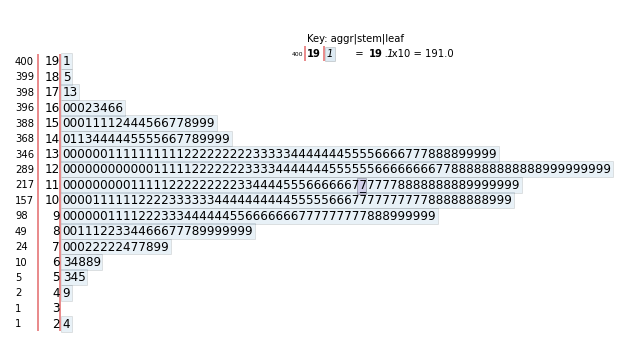

In [15]:
stemgraphic.stem_graphic(carData["Price"],scale=10)

(<Figure size 540x432 with 1 Axes>, <Axes:>)

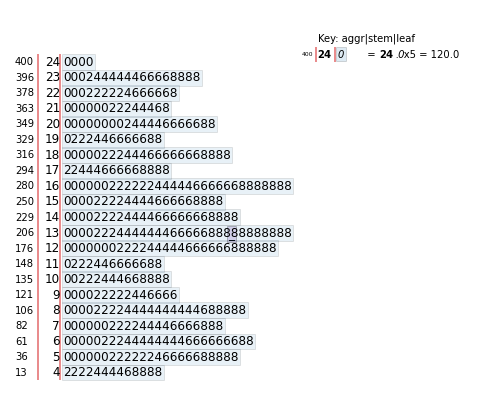

In [16]:
stemgraphic.stem_graphic(carData["Income"],scale=5)

(<Figure size 540x324 with 1 Axes>, <Axes:>)

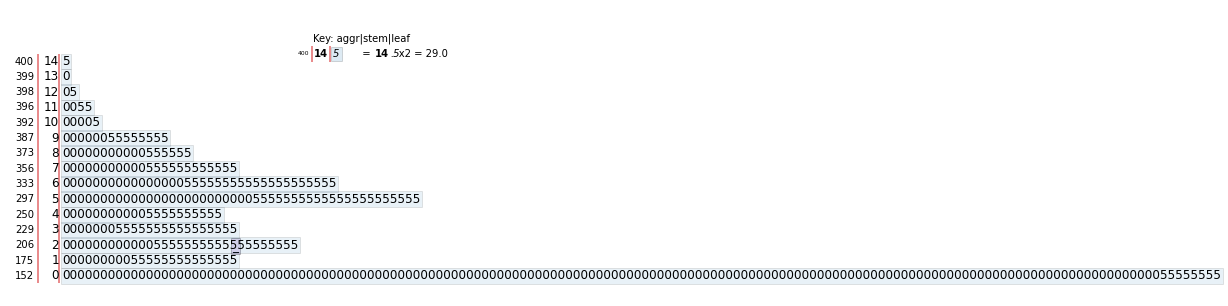

In [17]:
stemgraphic.stem_graphic(carData["Advertising"],scale=2)

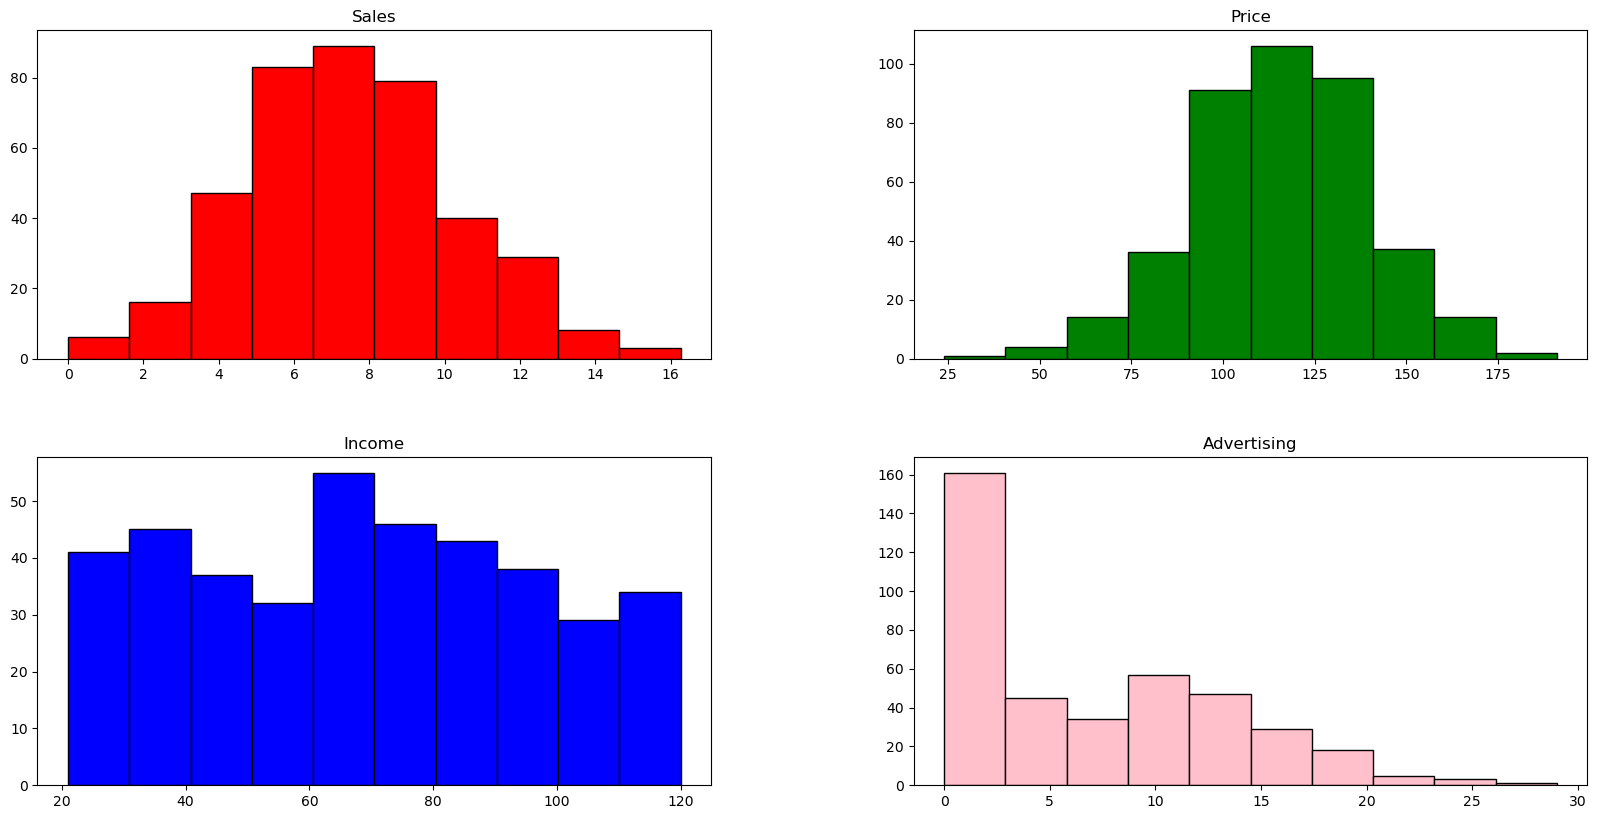

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,10),dpi=100)
carData.hist(column="Sales",ax=axes[0,0], color = "red",edgecolor = 'black',grid = False)
carData.hist(column="Price",ax=axes[0,1], color = "green",edgecolor = 'black',grid = False)
carData.hist(column="Income",ax=axes[1,0], color = "blue",edgecolor = 'black',grid = False)
carData.hist(column="Advertising",ax=axes[1,1], color = "pink",edgecolor = 'black',grid = False)
plt.show()


**Observation of the following features**
1. Sales:- It appears that the distribution is symmetric and leptokurtic.
2. Price:- It appears again that the distribution is symmetric and leptokurtic.
3. Advertising:- It is leptokurtic right-skewed in the distribution
4. Income:- It seems to be uniformaly distributed.

Since distribution of Sales and Price seems to be normally distributed, therefore it is logical to check the assumption of the normality using Q-Q plots.

**A Quantile-Quantile plot (Q-Q plot) is a scatterplot created by plotting
two sets of quantiles against one another. If both sets of quantiles came
from the same distribution, you should see the points forming a roughly
straight line**

C:\Users\Ashish\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Ashish\anaconda3\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


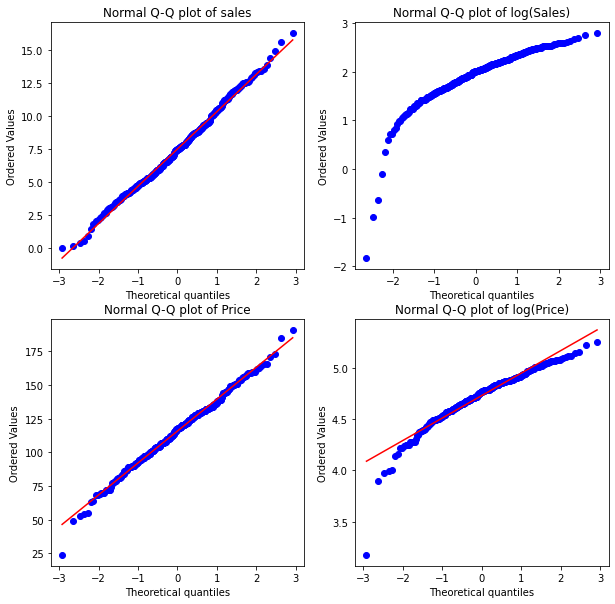

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
stats.probplot(carData["Sales"],dist="norm",plot=plt,fit=True)
plt.title("Normal Q-Q plot of sales")

plt.subplot(2,2,2)
stats.probplot(np.log(carData["Sales"]), dist="norm",plot = plt, fit=True)
plt.title("Normal Q-Q plot of log(Sales)")

plt.subplot(2,2,3)
stats.probplot(carData["Price"], dist="norm",plot = plt, fit=True)
plt.title("Normal Q-Q plot of Price")

plt.subplot(2,2,4)
stats.probplot(np.log(carData["Price"]), dist="norm",plot = plt, fit=True)
plt.title("Normal Q-Q plot of log(Price)")
plt.show()

From the above Q-Q plot we came to the conclusion that both Sale and Price seems to have a normal distribution as it fits the reference line in a better way

##### <span style = "background:red">2.3 Inference about the mean </span>

* Since Price and Sales are normally distributed hence the assumption of the t-test is satisfied. 
* One sample t-test is a statistical procedure used to determine whether a sample of observation could have been generated by a process with a specific population.

In [48]:
x=carData["Sales"]
# t-test to test mu = 7 with a confidence level = 0.95
print("Null Hypothesis(H0):pop mean is equal to 7""\n""Alternative Hypothesis(H1): pop mean is not equal to 7")
t_stats,p = stats.ttest_1samp(x,popmean=7)
L_limit,U_limit = stats.t.interval(alpha=0.95,df=len(x)-1, loc = np.mean(x), scale = stats.sem(x))
print("----------------------------------------------------------------------------------------------------")
print(f"t-statistics ={round(t_stats,4)}, p-value={round(p,4)}")
print(f"The estimated population mean is {np.mean(x)} and 95% CI is {(round(L_limit,4),round(U_limit,4))}")
print("With only 5% chance of being wrong, an assertion can be made that true mean of sales lies between",
      (round(L_limit,4),round(U_limit,4)))
print("-----------------------------------------------------------------------------------------------------")
if p<0.05:
    print("Rejecting the Null Hypothesis and conclude that the true sales mean is not equal to 7")
else:
    print('Accepting the Null Hypothesis and colclude that the true sales mean is equal to 7')


Null Hypothesis(H0):pop mean is equal to 7
Alternative Hypothesis(H1): pop mean is not equal to 7
----------------------------------------------------------------------------------------------------
t-statistics =3.5149, p-value=0.0005
The estimated population mean is 7.496325 and 95% CI is (7.2187, 7.7739)
With only 5% chance of being wrong, an assertion can be made that true mean of sales lies between (7.2187, 7.7739)
-----------------------------------------------------------------------------------------------------
Rejecting the Null Hypothesis and conclude that the true sales mean is not equal to 7


In [52]:
y = carData["Price"]
# t-test to test mu = 115 with a confidence level = 0.95
print("Null Hypothesis(H0):pop mean is equal to 115""\n""Alternative Hypothesis(H1): pop mean is not equal to 115")
t_stats,p = stats.ttest_1samp(y,popmean=115)
L_limit,U_limit = stats.t.interval(alpha=0.95,df=len(y)-1, loc = np.mean(y), scale = stats.sem(y))
print("----------------------------------------------------------------------------------------------------")
print(f"t-statistics ={round(t_stats,4)}, p-value={round(p,4)}")
print(f"The estimated population mean is {np.mean(y)} and 95% CI is {(round(L_limit,4),round(U_limit,4))}")
print("With only 5% chance of being wrong, an assertion can be made that true mean of sales lies between",
      (round(L_limit,4),round(U_limit,4)))
print("-----------------------------------------------------------------------------------------------------")
if p<0.05:
    print("Rejecting the Null Hypothesis and conclude that the true Price mean is not equal to 115")
else:
    print('Accepting the Null Hypothesis and colclude that the true Price mean is equal to 115')

Null Hypothesis(H0):pop mean is equal to 115
Alternative Hypothesis(H1): pop mean is not equal to 115
----------------------------------------------------------------------------------------------------
t-statistics =0.6715, p-value=0.5023
The estimated population mean is 115.795 and 95% CI is (113.4677, 118.1223)
With only 5% chance of being wrong, an assertion can be made that true mean of sales lies between (113.4677, 118.1223)
-----------------------------------------------------------------------------------------------------
Accepting the Null Hypothesis and colclude that the true Price mean is equal to 115



#####  <span style = "background:red"> 2.4 Impact of Categorical Variables </span>
##### <span style = "background:Green"> 2.4.1 Subset of dataset based on whether the store is located in the US or not</span>

In [57]:
carData_within_US=carData[carData["US"]=="No"]
carData_outside_US =carData[carData["US"]!="No"]

In [60]:
carData_outside_US.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,7.866899,125.166667,70.515504,10.007752,271.453488,116.810078,53.426357,13.748062
std,2.877131,14.971547,27.979456,5.917061,144.436459,22.593489,15.571737,2.665987
min,0.370000,85.000000,21.000000,0.000000,12.000000,55.000000,25.000000,10.000000
25%,5.762500,115.250000,45.000000,5.000000,148.250000,101.000000,41.250000,11.000000
50%,7.790000,125.000000,70.000000,10.000000,281.500000,118.000000,54.500000,14.000000
75%,9.987500,135.000000,93.000000,14.000000,397.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [61]:
carData_within_US.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,6.823028,124.626761,65.281690,0.507042,252.823944,113.950704,53.133803,14.176056
std,2.602585,16.021089,27.778599,1.644878,152.355328,25.506869,17.339427,2.521677
min,0.000000,77.000000,22.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.080000,115.000000,39.000000,0.000000,113.750000,98.000000,38.000000,12.000000
50%,6.660000,124.000000,66.500000,0.000000,244.000000,116.500000,54.500000,14.000000
75%,8.522500,134.000000,84.000000,0.000000,398.250000,129.750000,65.750000,16.000000
max,14.900000,159.000000,120.000000,11.000000,508.000000,185.000000,80.000000,18.000000


**From the above description, I can see that there a huge difference in the advertising budgets inside and outside the US**

In [ ]:
## Making side by side boxplots to visualize the difference between distributions of Subsetted datasets
Before performing the t-test, it is good to have some intuition about the
distribution of the Sales and Price inside and outside the US. Therefore, a
side-by-side boxplot is used to compare the distribution of a continuous
variable as subsetted by a categorical variable.

<AxesSubplot:xlabel='US', ylabel='Price'>

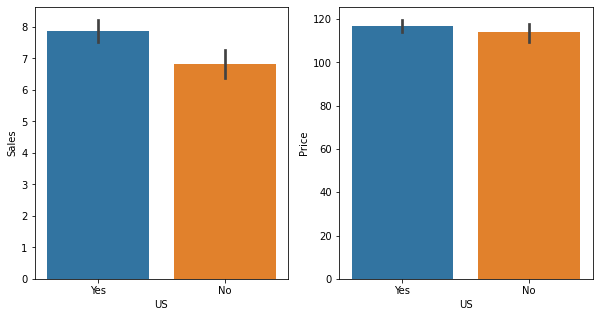

In [72]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,5))
sns.barplot(x=carData['US'],y=carData["Sales"],ax=ax1)
sns.barplot(x=carData["US"],y=carData["Price"],ax=ax2)

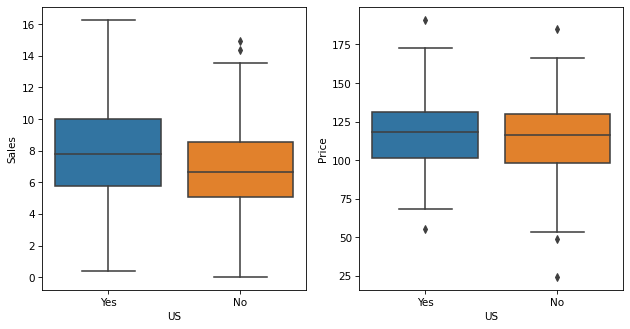

In [67]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,5),dpi=75)
sns.boxplot(x=carData['US'],y=carData["Sales"],ax=ax1)
sns.boxplot(x=carData["US"],y=carData["Price"],ax=ax2)
plt.show()

We can see that there are some outliers presents in both the boxplots but we can ignore them as they are not so much high. Moreover, sales is slighlty higher inside the US, and the distribution of Price does not seems to vary much inside and outside the US.

However we need to check if the difference observed in Sales is statistically significant or not. For that we need to perform an **indenpendent sample t-test (two sample t-test).**

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Performing the two-sample t-test for equality of means to determine the significance of the difference in the Price, Sales inside and outside the US.**

In [75]:
t,p = stats.ttest_ind(carData_within_US["Sales"],carData_outside_US["Sales"],equal_var=False)
print('t-statistics for independent t-test on Sales = %.4f and p-value=%.4f'%(t,p))

t-statistics for independent t-test on Sales = -3.6956 and p-value=0.0003


For sales,since the p-value is less than 0.05, therefore **we reject the null hypothesis** of no difference between the Sales and conclude that **sales differ significantly inside and outside the US.**

In [76]:
t,p = stats.ttest_ind(carData_within_US["Price"],carData_outside_US["Price"],equal_var=False)
print('t-statistics for independent t-test on Price = %.4f and p-value=%.4f'%(t,p))

t-statistics for independent t-test on Price = -1.1164 and p-value=0.2653


For Price, since the p-value is greater than 0.05, we **do not reject the null hypothesis** and conclude that **prices do not differ significantly inside and outside the US** in the given sample. 


##### <span style = "background:Green"> 2.4.2 Performing Analysis by subsetting using ShelveLoc</span>

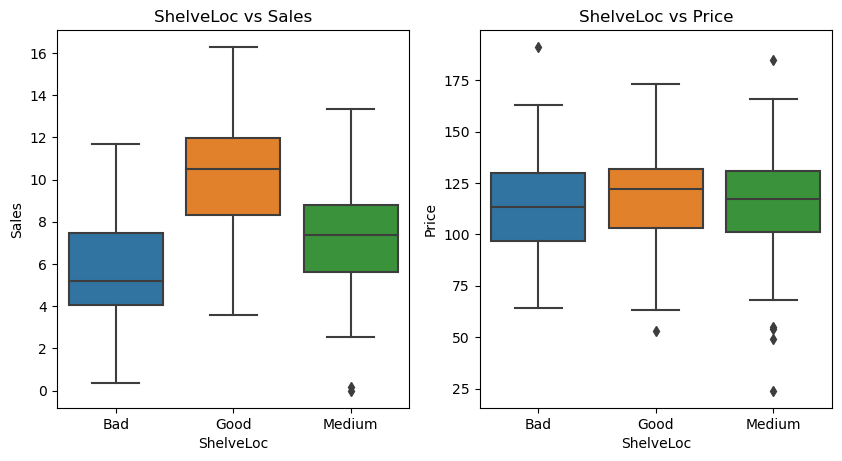

In [86]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,5),dpi=100)
sns.boxplot(x=carData['ShelveLoc'],y=carData["Sales"],ax=ax1)
sns.boxplot(x=carData["ShelveLoc"],y=carData["Price"],ax=ax2)
ax1.set_title("ShelveLoc vs Sales")
ax2.set_title("ShelveLoc vs Price")
plt.show()

* Sales seems to be impacted by ShelveLoc. The **median of Sales is highest for Good** followed by Medium and Bad respectively.

* Price does not seems to be impacted by ShelveLoc

However, to test for the statistical significance of the difference between means of Sales across three levels of ShelveLoc, **an F-test has to be performed**. 

_**Performing an F-test to check for the homogeneity of Sales for the three levels of ShelveLoc.**_ 

In [94]:
print("The Hypothesis is")
print("Null Hypothesis(H0): Means of all class is equal to pop mean")
print("Alternative Hypothesis(H1): Means of all class is not equal to pop mean")
print("----------------------------------------------------------------------------------------------------")
F_stats,p =stats.f_oneway(
carData['Sales'][carData["ShelveLoc"]=="Bad"],
carData['Sales'][carData["ShelveLoc"]=="Good"],
carData['Sales'][carData["ShelveLoc"]=="Medium"]
)
print("F-statistic=%.4f, p-value=%.4f"%(F_stats,p))
if p<0.05:
    print('Rejecting H0 and conclude that mean population sales are not homogenous across levels of ShelveLoc')
else:
    print("Accepting H0 and conclude that mean population Sales are homogenous across levels of ShelveLoc")

The Hypothesis is
Null Hypothesis(H0): Means of all class is equal to pop mean
Alternative Hypothesis(H1): Means of all class is not equal to pop mean
----------------------------------------------------------------------------------------------------
F-statistic=92.2299, p-value=0.0000
Rejecting H0 and conclude that mean population sales are not homogenous across levels of ShelveLoc



## <span style = "background:yellow"> 3. Bivariate Analysis</span>
##### <span style = "background:Red"> 3.1 Correlation Analysis</span>

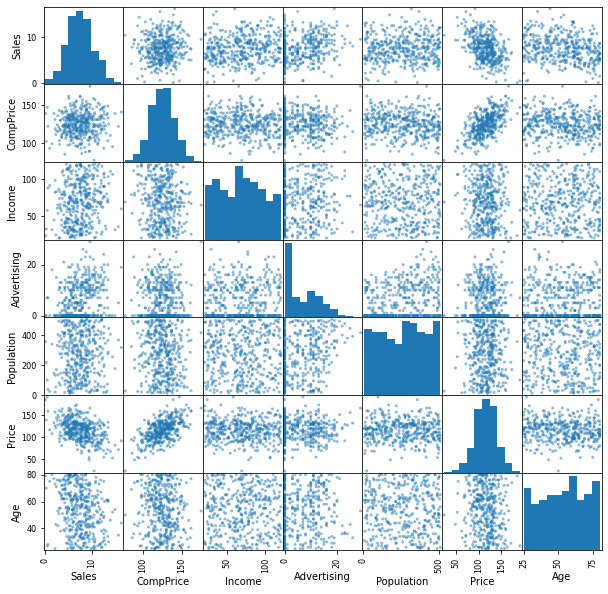

In [103]:
scatter_matrix(carData[["Sales","CompPrice","Income","Advertising","Population","Price","Age"]],
               figsize=(10,10))
plt.show()

As we can see that _Sales and Price is negatively correlated_. Whereas, Sales and Advertising appear to be a slightly positively correlated. Moreover, there is a postive correaltion between Price and CompPrice.

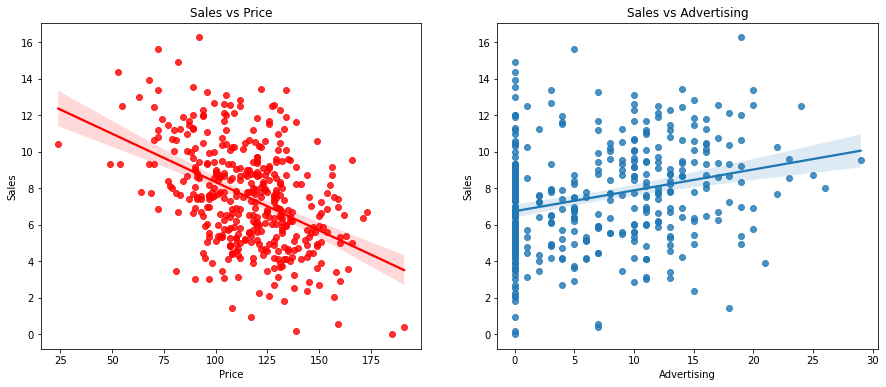

In [113]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,6))
sns.regplot(x="Price",y="Sales",data=carData,ax=ax1,color="red")
sns.regplot(y=carData["Sales"],x=carData["Advertising"],ax=ax2)
ax1.set_title("Sales vs Price")
ax2.set_title("Sales vs Advertising")
plt.show()

* The relationship between Price and Sales is negative. That is, at a higher price, sales tend to be lower. The line of best fit also has a negative slope in the above plot.

* There is a mildly positive association between Advertising and Sales. The scattered points suggest that the linear relationship is not strong.

**Now I will be performing bivariate correlation analysis for the pairs (sales, Price) and (Sales, Advertising)**

_A hypothesis test of the "significance of the correlation coefficient" is
performed to decide whether the linear relationship in the sample data is
strong enough to use to make inferences about the relationship in the
population_

In [121]:
# Sample correlation coefficient- r
#Population correlation coefficient- 𝜌
print(carData[["Sales","Price"]].corr())
print("---------------------------------------------------------------------------------------------------")
print("Null Hypothesis(H0):𝜌 = 0")
print("Alternative Hypothesis(H1):𝜌≠0")
print("---------------------------------------------------------------------------------------------------")
c_stats,p = stats.pearsonr(carData["Sales"],carData["Price"])
print("C-statistics(𝜌)=%.4f, p-value=%.4f"%(c_stats,p))
if p<0.05:
    print("Rejecting H0 and conclude that population correlation coefficient is statistically significant")
else:
    print("Accepting H0")

          Sales     Price
Sales  1.000000 -0.444951
Price -0.444951  1.000000
---------------------------------------------------------------------------------------------------
Null Hypothesis(H0):𝜌 = 0
Alternative Hypothesis(H1):𝜌≠0
---------------------------------------------------------------------------------------------------
C-statistics(𝜌)=-0.4450, p-value=0.0000
Rejecting H0 and conclude that population correlation coefficient is statistically significant


In [124]:
c,p = stats.pearsonr(carData['Sales'],
carData['Advertising'])
print('correlation coefficient between Sales and Advertising = %f \n p-value = %f' % (c,p))

correlation coefficient between Sales and Advertising = 0.269507 
 p-value = 0.000000


In this case, the p-value below 0.05 supports the observation about _**some
positive correlation between Advertising and Sales**_

##### <span style = "background:Red"> 3.2 Bivariate Linear Regression Analysis</span>

###### _Fitting a bivariate linear regression model_
Here I can use scikit learn **LinearRegression()** function from the linear_model module which has an inbuilt parameter "fit_intercept" where it is easier to fit models but it does not have summary method.

Where statsmodel's OLS() function has the summary() method which we can used to display the details of the fitted model.

In [12]:
X = carData["Price"]
y = carData["Sales"]
X = sm.add_constant(X)
model =sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           7.62e-21
Time:                        12:11:18   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.0

C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1. According to OLS regression result, the best predictive equation for sales given Price is **Sales = 13.6419-0.0531*Price**

_**For a unit increase in Price, Sales are expected to decrease by approximately 53 units.**_

2. The adjusted $R^{2}$ of the above model is 0.196. Hence, _**19.6% of the variability in sales is explained by Price.**_

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

##### <span style = "background:Red"> 3.3 Regression Diagnostics</span>

C:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


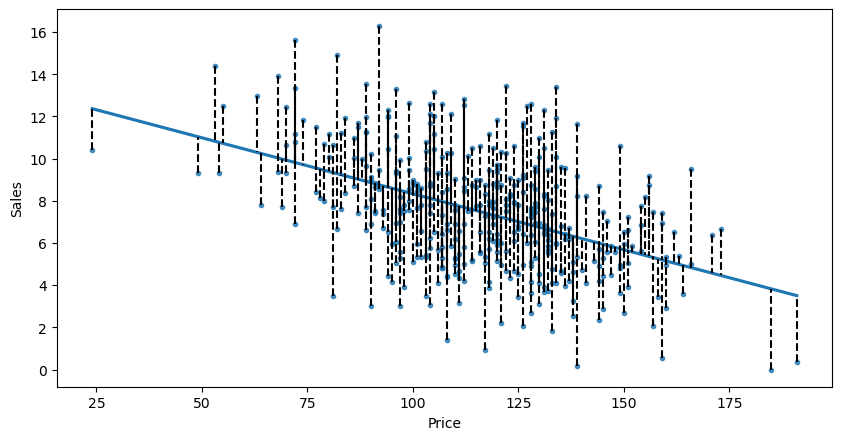

In [14]:
fig1,ax1 = plt.subplots(figsize=(10,5),dpi=100)
sns.regplot("Price","Sales",data=carData,ax=ax1,ci=False,marker=".")
ax1.plot([carData["Price"],carData["Price"]],
         [carData["Sales"],model.predict()],
         linestyle="--",color="black")
plt.show()

**Plot Residuals vs Predicted with 3,2,1 sigma limits (to test the presence of Heteroscedasticity)**

When a plot of residuals against the predicted values shows some pattern then we can say that **heteroscedasticity(non-constant variance of the error term)** is present in the data otherwise not.

C:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


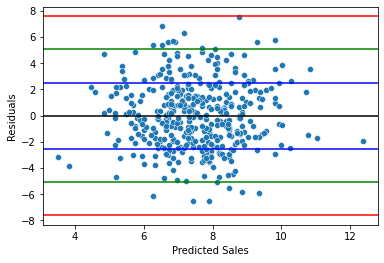

In [7]:
y_pred = model.predict()
residuals = y-y_pred
sd_red=np.std(residuals)
a = [-3,-2,-1,0,1,2,3]
b = ["r","g","b","k","b","g","r"]
sns.scatterplot(y_pred,residuals)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
for i,j in zip(a,b):
    plt.axhline(i*sd_red,color=j)

All the residuals should ideally fall on the horizontal line with a y-intercept as 0. However they don't fall on that line due to the presence of error. But in any case, they should be symmetric about this line throughout the range and have same degree of spread.**There is no visible patter** in the plot and **spread seems to be random**. Therefore there is **no heteroscedasticity** in the data.

**Visualise the distribution of residuals(To test for the normality of error terms)**

<Figure size 720x720 with 0 Axes>

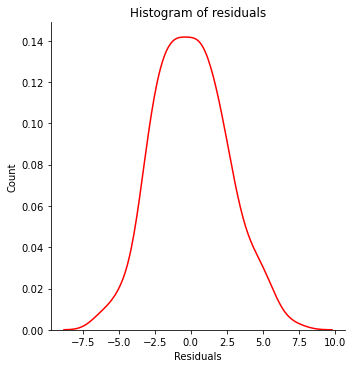

In [8]:
plt.figure(figsize=(10,10))
sns.displot(residuals,color="red",kind='kde')
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.title("Histogram of residuals")
plt.show()

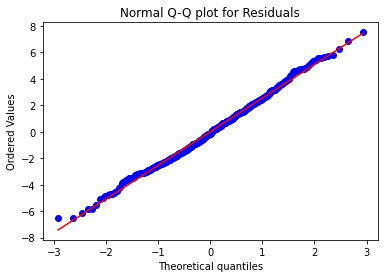

In [9]:
stats.probplot(residuals,dist="norm",plot=plt,fit=True)
plt.title("Normal Q-Q plot for Residuals")
plt.show()

* Based on the above-plotted distribution plot, the residuals are **symmetric about zero and seems to be normally distributed.**

* For most of the part, the residuals follow the theoretical normal distribution well, they are **very close to the normal line**. However, there is a **slight deviation towards the left end.** This deviation does not significant for the analysis and can be ignored.

##### <span style = "background:Red"> 3.4 Root Mean Squared Error(RMSE)</span>

In [10]:
rmse=sk.mean_squared_error(y,y_pred,squared=False)
print(f"RMSE is {round(rmse,4)}")
r2= sk.r2_score(y,y_pred)
print(f"r2 score is {round(r2,4)}")

RMSE is 2.526
r2 score is 0.198


Any two models **cannot be compared using RMSE as it depends upon the units of the dependent variable(y)**. Hence,a lower RMSE need not necessarily imply that one model is better than the other.

However, $R^{2}$ can overcome this drawback of RMSE and can be used to compare different models having the **Same number of independent variables**

##### <span style = "background:Red"> 3.5 Prediction of the response variable</span>

##### <span style = "background:green"> Method 1: Regression Equation</span>

In [11]:
mp=model.params
mean_price=np.mean(X["Price"])
pred_sale=mp["const"]+mean_price*mp["Price"]
print("Predicted value of the Sales given mean price is",round(pred_sale,4))

Predicted value of the Sales given mean price is 7.4963



##### <span style = "background:Red"> 3.6 Confidence and Prediction Interval</span>

A **Confidence Interval** is the range of values associated with a population parameter for a given CI.

A **Prediction Interval** is a range of the values that is likely to contain the value of a single new observation given specified settings of predictors.

A prediction interval is always wider than the corresponding confidence interval since it takes into account the unvertainty associated with a future obervation.

In [12]:
result=model.get_prediction().summary_frame()
result.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7.273153,0.128603,7.020328,7.525978,2.288331,12.257975
1,9.236855,0.216487,8.811255,9.662455,4.240289,14.233420
2,9.396074,0.229708,8.944481,9.847667,4.397227,14.394920
3,8.493832,0.161739,8.175864,8.811801,3.505282,13.482383
4,6.848569,0.142486,6.568449,7.128689,1.862288,11.834850


The mean_ci_upper and mean_ci_lower columns of the result
DataFrame are the upper and lower confidence intervals respectively.
Whereas, obs_ci_upper and nd obs_ci_lower columns are the upper and
lower prediction intervals.

C:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


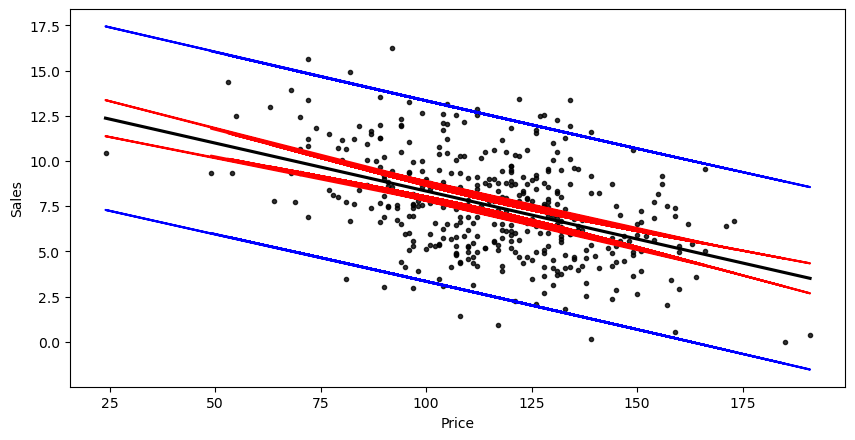

In [13]:
fig,ax1 = plt.subplots(figsize=(10,5),dpi=100)
sns.regplot("Price","Sales",data=carData,ax=ax1,ci=False,marker=".",color="black")
ax1.plot(carData["Price"],result["mean_ci_lower"],color="red")
ax1.plot(carData["Price"],result["mean_ci_upper"],color="red")
ax1.plot(carData["Price"],result["obs_ci_lower"],color='b')
ax1.plot(carData["Price"],result["obs_ci_upper"],color='b')
plt.show()

Here we can see that the prediction level (blue line) is much **wider** than the confidence interval(red line).

## <span style = "background:yellow"> 4. Multivariate Correlation and Regression</span>
##### <span style = "background:Red"> 4.1 Multivariate Correlation Analysis</span>

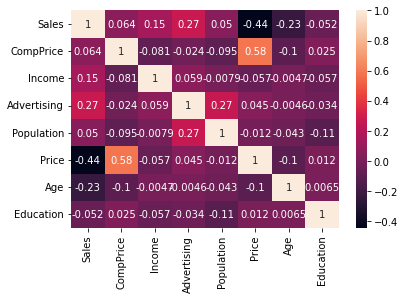

In [16]:
sns.heatmap(carData.corr(),annot=True)
plt.show()

* The sales variable has a moderate negative correlation with price, a low positive correlation with Advertising and Income, and very low positive correlation with CompPrice.

* Price has a very low positive and negative correlation with Advertising and Income respectively. It also shows a moderately positive correlation with CompPrice.

* Advertising has a very low positive and negative correlation with Income and CompPrice respectively.

* Income has a very low negative correlation with CompPrice.



##### <span style = "background:Red"> 4.2 Multivariate Regression Analysis</span>


**<span style = "background:Green">(a) Null Model</span>**

A null model has **no predictors**. It just contains one intercept where the intercept is the mean of Y. For fitting the null model, we will pass an array of ones as the independent variable.

However null model does not return any $R^{2}$ or adjusted $R^{2}$ value as it has no independed variable in the model. Hence, the total sum of squarea is equal to the error sum of squares.

In [20]:
X1 = np.ones(400)
null = sm.OLS(y,X1).fit()
null.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                nan
Time:                        23:48:14   Log-Likelihood:                -982.35
No. Observations:                 400   AIC:                             1967.
Df Residuals:                     399   BIC:                             1971.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4963      0.141     53.088      0.000       7.219       7.774
==============================================================================
Omnibus:                        2.381   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                2.428
Skew:                           0.185   Prob(JB):                        0.297
Kurtosis:                       2.905   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**<span style = "background:green">(b) Simple Linear Regression</span>**

Sales and Price

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           7.62e-21
Time:                        23:53:43   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
X2 = carData["Advertising"]
X2 = sm.add_constant(X2)
model_Ad = sm.OLS(y,X2).fit()
model_Ad.summary()

C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     31.17
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           4.38e-08
Time:                        00:04:14   Log-Likelihood:                -967.27
No. Observations:                 400   AIC:                             1939.
Df Residuals:                     398   BIC:                             1947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7370      0.192     35.007      0.000       6.359       7.115
Advertising     0.1144      0.020      5.583      0.000       0.074       0.155
==============================================================================
Omnibus:                        3.396   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.137
Skew:                           0.200   Prob(JB):                        0.208
Kurtosis:                       3.167   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


**<span style = "background:Green">(c) Multiple Regression Analysis</span>**

In [28]:
X3 = carData[["Price","Advertising"]]
X3 = sm.add_constant(X3)
model_multi = sm.OLS(y,X3).fit()
model_multi.summary()

C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     77.91
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           2.87e-29
Time:                        00:11:02   Log-Likelihood:                -916.14
No. Observations:                 400   AIC:                             1838.
Df Residuals:                     397   BIC:                             1850.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0034      0.607     21.428      0.000      11.810      14.196
Price          -0.0546      0.005    -10.755      0.000      -0.065      -0.045
Advertising     0.1231      0.018      6.809      0.000       0.088       0.159
==============================================================================
Omnibus:                        1.120   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                1.006
Skew:                           0.121   Prob(JB):                        0.605
Kurtosis:                       3.037   Cond. No.                         599.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we can see that both Price and Advertising have p-value>0.05.This suggests that both the variables are significant for the regression.

Based on the $R^{2}$ values of the models, we conclude that the following
* **19.8% variability of sales has been explained by Price.**

* **7.3% variability of sales has been explained by Advertising Budget.**

* **28.2% variability of Sales has been explained by both Price and Advertising.**

The **predicted equation** of each of the three model are:

Nulls: Sales = 7.496

Simple: Sales = 13.642 - 0.059*Price
    
Simple: Sales = 6.737 + 0.114*Advertising
    
Multiple: Sales = 13.003 - 0.054*Price + 0.123*Advetising

##### <span style = "background:Red"> 4.3 Comparing Models using adjusted $R^{2}$, AIC and ANOVA</span>
**<span style = "background:Green"> (a) Comparing regression model with the adjusted $R^{2}$ </span>**


In [33]:
print("The adjusted 𝑅2 for null model is: ",null.rsquared_adj.round(5))
print("The adjusted 𝑅2 for model with sales and price model is:",model.rsquared_adj.round(5))
print("The adjusted 𝑅2 for model with sales and advertising model is:",model_Ad.rsquared_adj.round(5))
print("The adjusted 𝑅2 for model with Multiple variable model is:",model_multi.rsquared_adj.round(5))

The adjusted 𝑅2 for null model is:  0.0
The adjusted 𝑅2 for model with sales and price model is: 0.19597
The adjusted 𝑅2 for model with sales and advertising model is: 0.0703
The adjusted 𝑅2 for model with Multiple variable model is: 0.27824


As we can see that the **multiple linear regression model of sales on price and advertising has a higher adjusted $R^{2}$ as compared to the other simple models**.This suggests an improvement in the model fit.

**<span style = "background:green"> (b) Comparing Regression Modesl with (Akaike Information Criterion)AIC</span>**

AIC is used to compare different possible models and determine which on is the best fit for the data.
A good model is the one that has minimum AIC among all the other models. A **Lower AIC** value indicates a better fit.

In [36]:
print("The AIC for Null model is:",null.aic.round(5))
print("The AIC for Simple Linear regression model with Sales and Price is:",model.aic.round(5))
print("The AIC for model with Sales and Advertisment:",model_Ad.aic.round(5))
print("The AIC for multi-linear regression model:",model_multi.aic.round(5))

The AIC for Null model is: 1966.70562
The AIC for Simple Linear regression model with Sales and Price is: 1880.45635
The AIC for model with Sales and Advertisment: 1938.54287
The AIC for multi-linear regression model: 1838.27177


Here we can see that multiple linear regression model of Sales on both Price and Advertising has the **Lowest AIC** among the set of candidate models and hence it is the best model.

**<span style = "background:green"> (c) Comparing regression models with ANOVA</span>**

ANOVA is used to compare two models by using an F-test.

**_Comparing (Sales on Price and Advertising) and (Sales on Price)_**

In [47]:
anova_1 = anova_lm(model,model_multi)
print(anova_1)
print("------------------------------------------------------------------------------------------------")
print("Reduction in RSS="+
     str((anova_1["ssr"][0]-anova_1["ssr"][1])/anova_1["ssr"][0]))

   df_resid          ssr  df_diff    ss_diff         F        Pr(>F)
0     398.0  2552.244293      0.0        NaN       NaN           NaN
1     397.0  2285.332743      1.0  266.91155  46.36694  3.639822e-11
------------------------------------------------------------------------------------------------
Reduction in RSS=0.10457915441004233


The p-value< 0.05 for the ANOVA test. Hence, we reject the null hypothesis and conclude that the multiple regression model of sales is better than the simple model of Sales on Price.

The simple model has one higher degree of freedom as it has one less independent variable in the model. A 10.5% reduction is seen in the residual sum of squares as compared to the simple model.

**_Comparing (Sales on Price and Advertising) and (Sales on Advertising)_**

In [49]:
anova_2 = anova_lm(model_Ad,model_multi)
print(anova_2)
print('-----------------------------------------------------------------------------------------------')
print("Reduction in RSS="+
     str((anova_2["ssr"][0]-anova_2["ssr"][1])/anova_2["ssr"][0]))

   df_resid          ssr  df_diff     ss_diff           F        Pr(>F)
0     398.0  2951.133659      0.0         NaN         NaN           NaN
1     397.0  2285.332743      1.0  665.800916  115.660603  7.596365e-24
-----------------------------------------------------------------------------------------------
Reduction in RSS=0.22560852645992321


The p-value <0.05 for the Anova Test. Hence we reject the null hypothesis and conclude that the multiple regression models of sales is better than the simple model of sales on advertising.

We can see that **22.56% reduction in Residual sum of Square** as compared to a simple model of Sales ~ Advertising.


##### <span style = "background:Red"> 4.4 Regression Diagnostics the best model</span>

**<span style = "background:Green"> (i) Normality Check</span>**

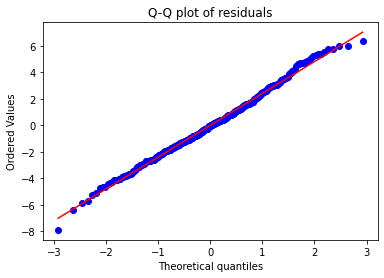

In [50]:
pred_multi = model_multi.predict(X3)
residual_multi = y- pred_multi
stats.probplot(residual_multi,dist="norm", plot=plt)
plt.title("Q-Q plot of residuals")
plt.show()

**<span style = "background:Green"> (ii) Fitted vs Actual Sales</span>**

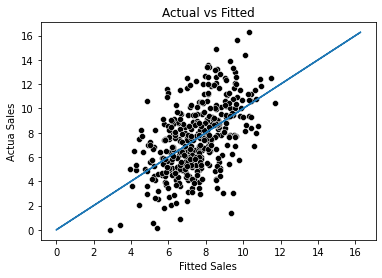

In [56]:
sns.scatterplot(x=pred_multi,y=y,color= "black")
plt.xlabel('Fitted Sales')
plt.ylabel("Actua Sales")
plt.plot(y,y)
plt.title("Actual vs Fitted")
plt.show()

**<span style = "background:Green"> (iii) Residuals vs Fitted Sales</span>**

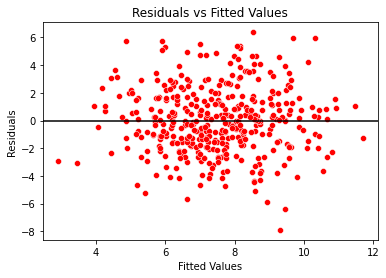

In [60]:
sns.scatterplot(x=pred_multi,y=residual_multi,color="red")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.axhline(0,color="black")
plt.show()

**Observation**

* The distribution seems to be normal. However, a slight deviation towrds the two ends can be ignored.
* On looking at the Actual vs Fitted Values, the scatter is too much deviated from the reference line. Thus the model is not performing up to the mark
* There is no pattern in the residuals vs fitted values plot. Hence, we can conclude that the error are homoscedastic.

**<span style = "background:Red"> 4.5 Stepwise regression</span>**

A model that uses all independed variables to predict the dependent variable. Then at each step, a variable is removed based on some criteria

In [126]:
data=pd.get_dummies(carData,drop_first=True)
X = data.iloc[:,1:]
y=data["Sales"]
lm=LinearRegression()
lm.fit(X,y)
rfe = RFE(lm,n_features_to_select=8,verbose=1)
rfe=rfe.fit(X,y)
list(zip(X.columns,rfe.support_,rfe.ranking_))

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


[('CompPrice', True, 1),
 ('Income', False, 3),
 ('Advertising', True, 1),
 ('Population', False, 4),
 ('Price', True, 1),
 ('Age', True, 1),
 ('Education', False, 2),
 ('ShelveLoc_Good', True, 1),
 ('ShelveLoc_Medium', True, 1),
 ('Urban_Yes', True, 1),
 ('US_Yes', True, 1)]

In [113]:
X_final = X[X.columns[rfe.support_]]
lmbest = sm.OLS(y,sm.add_constant(X_final)).fit()
lmbest.summary()

C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     274.1
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          3.79e-155
Time:                        21:45:18   Log-Likelihood:                -604.71
No. Observations:                 400   AIC:                             1227.
Df Residuals:                     391   BIC:                             1263.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.8353      0.523     13.065      0.000       5.807       7.864
CompPrice            0.0904      0.004     20.135      0.000       0.082       0.099
Advertising          0.1243      0.012     10.806      0.000       0.102       0.147
Price               -0.0957      0.003    -32.919      0.000      -0.101      -0.090
Age                 -0.0465      0.003    -13.434      0.000      -0.053      -0.040
ShelveLoc_Good       4.7870      0.166     28.775      0.000       4.460       5.114
ShelveLoc_Medium     1.8856      0.137     13.786      0.000       1.617       2.155
Urban_Yes            0.1568      0.123      1.278      0.202      -0.084       0.398
US_Yes              -0.0998      0.160     -0.625      0.533      -0.414       0.214
==============================================================================
Omnibus:                        1.653   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.734
Skew:                           0.148   Prob(JB):                        0.420
Kurtosis:                       2.870   Cond. No.                     1.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By looking at the summary table, it confirms that **US and Urban are not significant(p>0.05) for explaining the regression of Sales. Thus, we remove them from the set of independent variables.**

In [114]:
X_final=X_final.drop(["US_Yes","Urban_Yes"],axis=1)
lmbest = sm.OLS(y,sm.add_constant(X_final)).fit()
lmbest.summary()

C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     365.1
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          2.79e-157
Time:                        21:45:26   Log-Likelihood:                -605.73
No. Observations:                 400   AIC:                             1225.
Df Residuals:                     393   BIC:                             1253.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.8830      0.520     13.236      0.000       5.861       7.905
CompPrice            0.0907      0.004     20.225      0.000       0.082       0.099
Advertising          0.1199      0.008     14.287      0.000       0.103       0.136
Price               -0.0957      0.003    -32.918      0.000      -0.101      -0.090
Age                 -0.0464      0.003    -13.415      0.000      -0.053      -0.040
ShelveLoc_Good       4.7686      0.166     28.761      0.000       4.443       5.095
ShelveLoc_Medium     1.8767      0.136     13.783      0.000       1.609       2.144
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.728
Skew:                           0.140   Prob(JB):                        0.422
Kurtosis:                       2.842   Cond. No.                     1.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Therefore the best model is 

**Sales~CompPrice + Advertising + Price + Age + ShelveLoc_Good + ShelveLoc_Medium** 

Because 84.6% of the variability is explained by the model as given by the adjusted $R^{2}$ value. Since the p-value for the t-test of the significance of all the regression coefficients is almost zero. Therefore, _**all the explanatory varaibles in the best model are significant.**_

**<span style = "background:Red">4.5.1 Regression Diagnostics of Best Model</span>**

In [129]:
pred = lmbest.predict()
resi = y-pred

**<span style = "background:green">(1) Q-Q plot of residuals</span>**

Text(0.5, 1.0, 'Q-Q plot of residuals')

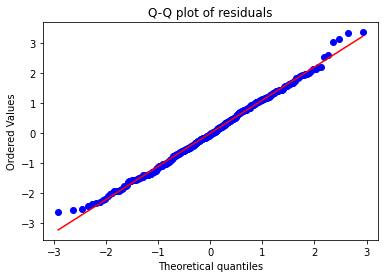

In [132]:
stats.probplot(resi,dist="norm",plot=plt)
plt.title("Q-Q plot of residuals")



**<span style = "background:green">(2) Fitted vs Actual Sales</span>**

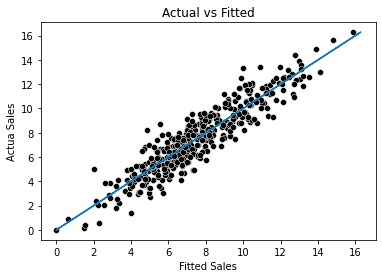

In [133]:
sns.scatterplot(x=pred, y=y,color="black")
plt.xlabel('Fitted Sales')
plt.ylabel("Actua Sales")
plt.plot(y,y)
plt.title("Actual vs Fitted")
plt.show()

**<span style = "background:green">(3) Residuals vs Fitted Sales</span>**

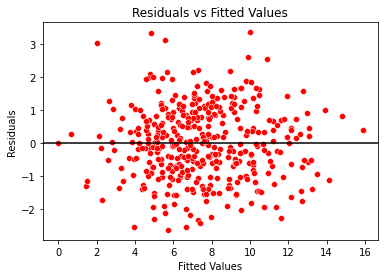

In [134]:
sns.scatterplot(x=pred,y=resi,color="red")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.axhline(0,color="black")
plt.show()

* Distribution seems to be normally distributed
* Fitted values are very close to reference line compared to the multiple regression with 2 variables
* There seems to be no pattern in the plot, therefore erros appear to be homoscedastic.

**<span style = "background:red">4.6 Multicollinearity</span>**

In [140]:
def vif_cal(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif["VIF"]= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif
vif_cal(X_final)

,Variables,VIF
0,CompPrice,49.591952
1,Advertising,1.985514
2,Price,38.287601
3,Age,9.771351
4,ShelveLoc_Good,1.877814
5,ShelveLoc_Medium,3.241473


As we can see that CompPrice is multicollinear with the remaining variables. Thus, we drop it from the independent variables and again check for the multicollinearity

In [143]:
X_final=X_final.drop("CompPrice",axis=1)
vif_cal(X_final)

,Variables,VIF
0,Advertising,1.982519
1,Price,9.308077
2,Age,8.033559
3,ShelveLoc_Good,1.847710
4,ShelveLoc_Medium,3.149700


Considering VIF>10, variables do not seems to be highly correlated. Thus, we can assume that there is **no severe multicollinearity** in the data.

In [146]:
final_model = sm.OLS(y,sm.add_constant(X_final)).fit()
final_model.summary()

C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     175.0
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.00e-97
Time:                        00:05:24   Log-Likelihood:                -748.40
No. Observations:                 400   AIC:                             1509.
Df Residuals:                     394   BIC:                             1533.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               14.4712      0.514     28.168      0.000      13.461      15.481
Advertising          0.1093      0.012      9.145      0.000       0.086       0.133
Price               -0.0615      0.003    -18.227      0.000      -0.068      -0.055
Age                 -0.0500      0.005    -10.144      0.000      -0.060      -0.040
ShelveLoc_Good       4.8172      0.237     20.365      0.000       4.352       5.282
ShelveLoc_Medium     1.9388      0.194      9.983      0.000       1.557       2.321
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.484
Skew:                           0.020   Prob(JB):                        0.785
Kurtosis:                       2.834   Cond. No.                         847.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**<span style = "background:green">Final Model Diagnostics</span>**

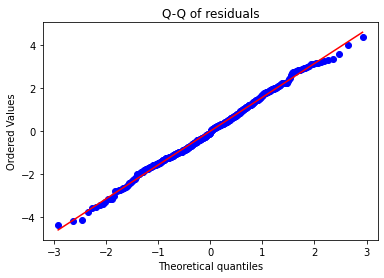

In [147]:
final_pred = final_model.predict()
final_resi = y-final_pred
stats.probplot(final_resi,dist="norm",plot=plt)
plt.title('Q-Q of residuals')
plt.show()

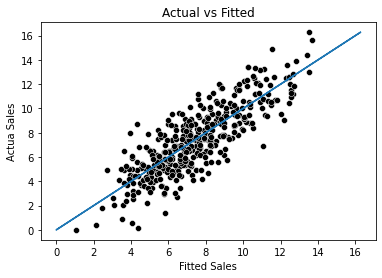

In [148]:
sns.scatterplot(x=final_pred, y=y,color="black")
plt.xlabel('Fitted Sales')
plt.ylabel("Actua Sales")
plt.plot(y,y)
plt.title("Actual vs Fitted")
plt.show()

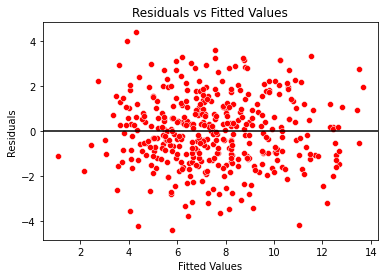

In [149]:
sns.scatterplot(x=final_pred,y=final_resi,color="red")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.axhline(0,color="black")
plt.show()

Therefore our **final model without any multi-correlation** and where almost 68.6% of the data is explained by our independent variables.

**<span style = "background:yellow">Sales~14.4712 + 0.1093*Advertising -0.0615*Price -0.0500*Age +4.8172*ShelveLoc_Good + 1.9388*ShelveLoc_Medium
</span>**

**<span style = "background:red">4.7 Parallel Slopes Model</span>**

A regression having additive effects of a numerical and categorical variables is termed as a **Parallel Slope Model**

**<span style = "background:green">1st Model: Simple Linear Regression between Price and Sales</span>**

In [150]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           7.62e-21
Time:                        00:56:10   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**<span style = "background:green">2nd Model: Linear Regression between Sales and ShelveLoc
</span>**

In [152]:
X4 = pd.get_dummies(carData["ShelveLoc"],drop_first=True)
model_shelveLoc = sm.OLS(y,sm.add_constant(X4)).fit()
model_shelveLoc.summary()

C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.27e-33
Time:                        01:03:24   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5229      0.239     23.131      0.000       5.054       5.992
Good           4.6911      0.348     13.464      0.000       4.006       5.376
Medium         1.7837      0.286      6.229      0.000       1.221       2.347
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.092
Skew:                           0.033   Prob(JB):                        0.955
Kurtosis:                       2.966   Cond. No.                         4.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adjusted $R^{2}$ for this model is 31.4% which is greater than the model with Price as the independent variable.

**<span style = "background:green">3rd Model:Regression with Sales on Price and ShelveLoc
</span>**

In [154]:
X5 =pd.concat([carData["Price"],X4],axis=1)
model_ShelPrice = sm.OLS(y,sm.add_constant(X5)).fit()
model_ShelPrice.summary()

C:\Users\Ashish\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     156.6
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           6.49e-67
Time:                        01:05:34   Log-Likelihood:                -825.92
No. Observations:                 400   AIC:                             1660.
Df Residuals:                     396   BIC:                             1676.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0018      0.503     23.839      0.000      11.012      12.992
Price         -0.0567      0.004    -13.967      0.000      -0.065      -0.049
Good           4.8958      0.286     17.123      0.000       4.334       5.458
Medium         1.8620      0.235      7.932      0.000       1.401       2.324
==============================================================================
Omnibus:                        1.779   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.651
Skew:                           0.062   Prob(JB):                        0.438
Kurtosis:                       2.711   Cond. No.                         638.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The combined model has the highest adjusted $R^{2}$. On adding ShelveLoc to the model on Price, the adjusted $R^{2}$ increases from 19% to 54%. 
Since the p-value of ShelveLoc is almost Zero in the combined model, it contributes significantly to explain the dependent variable Sales.

C:\Users\Ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


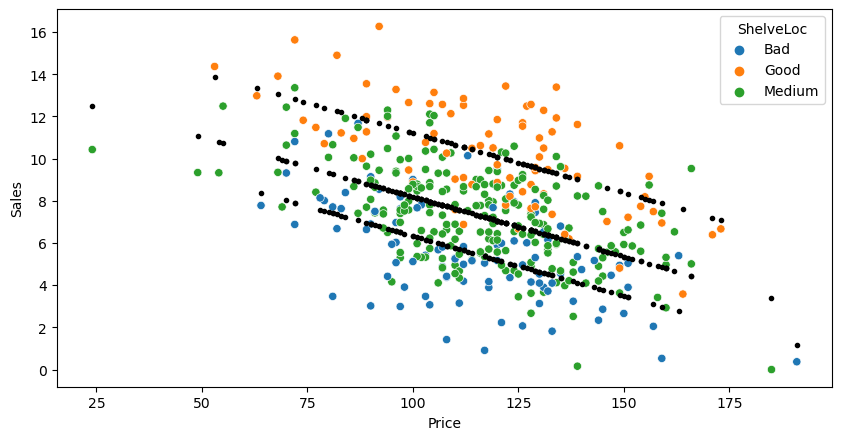

In [158]:
pred_parallel = model_ShelPrice.predict()
fig, ax =plt.subplots(figsize=(10,5),dpi=100)
sns.scatterplot("Price","Sales",hue="ShelveLoc",data=carData)
ax.scatter(carData["Price"],pred_parallel,marker=".",color="black")
plt.show()

As we can see all the fitted line are parallel to each other, it means that the intercepts of the lines are different though the slopes is same.

**<span style = "background:red">4.8 Interactions</span>**

In [160]:
carData_1 = pd.get_dummies(carData,drop_first=True)
int_model = ols(formula='Sales ~ Price +ShelveLoc_Good+ShelveLoc_Medium+Price:ShelveLoc_Good+Price:ShelveLoc_Medium',data=carData_1).fit()
int_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     94.17
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.62e-65
Time:                        01:31:09   Log-Likelihood:                -825.11
No. Observations:                 400   AIC:                             1662.
Df Residuals:                     394   BIC:                             1686.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 11.8330      0.966     12.252      0.000       9.934      13.732
Price                     -0.0552      0.008     -6.672      0.000      -0.071      -0.039
ShelveLoc_Good             6.1359      1.393      4.405      0.000       3.398       8.874
ShelveLoc_Medium           1.6305      1.172      1.392      0.165      -0.673       3.934
Price:ShelveLoc_Good      -0.0106      0.012     -0.900      0.369      -0.034       0.013
Price:ShelveLoc_Medium     0.0020      0.010      0.198      0.843      -0.018       0.022
==============================================================================
Omnibus:                        1.921   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.763
Skew:                           0.067   Prob(JB):                        0.414
Kurtosis:                       2.704   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value corresponding to the coefficient estimates of interaction terms is greater than 0.05. Hence, we can conclude that the interaction of Price and ShelveLoc does not play a significant role in explaining Sale in the model.

## <span style = "background:yellow">Conclusion</span>

1. Univariate analysis to understand the distribution of variables
2. Bivariate analysis to find out the relationship between two
variables.
3. Visualization techniques and their interpretation
4. Fitting linear models and comparing them using adjusted R2, AIC,
and ANOVA
5. Checking for the diagnostics of a linear regression model
6. Parallel Slopes Model and fitting models with interaction terms